In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('D:/Professional/data/questionPair/train.csv')


In [3]:
df.shape

(404290, 6)

In [4]:
df.sample(3)

,id,qid1,qid2,question1,question2,is_duplicate
99419,99419,165050,165051,Is it possible to have an out-of-body experience?,What is an out-of-body experience?,0
312323,312323,436751,418347,Which is the best ladies leather handbags bran...,What is the best handbag?,0
21531,21531,40531,40532,What is the best way to learn the German langu...,How can I learn German quickly?,1


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 404290 entries, 0 to 404289
Data columns (total 6 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            404290 non-null  int64 
 1   qid1          404290 non-null  int64 
 2   qid2          404290 non-null  int64 
 3   question1     404289 non-null  object
 4   question2     404288 non-null  object
 5   is_duplicate  404290 non-null  int64 
dtypes: int64(4), object(2)
memory usage: 18.5+ MB


In [6]:
df.isnull().sum()

id              0
qid1            0
qid2            0
question1       1
question2       2
is_duplicate    0
dtype: int64

In [7]:
df.duplicated().sum()

0

# Distribution of duplicate and non-duplicate questions

In [8]:
df['is_duplicate'].value_counts()

is_duplicate
0    255027
1    149263
Name: count, dtype: int64

In [9]:
len(df['is_duplicate'])

404290

In [10]:
(df['is_duplicate'].value_counts()/len(df['is_duplicate']))*100

is_duplicate
0    63.080215
1    36.919785
Name: count, dtype: float64

<Axes: xlabel='is_duplicate'>

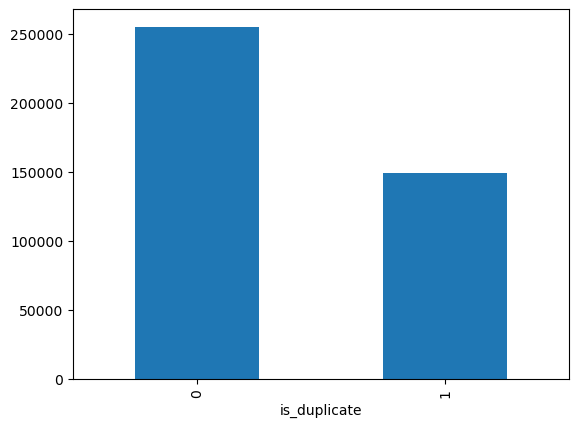

In [11]:
df['is_duplicate'].value_counts().plot(kind='bar')

In [12]:
df['qid1'].value_counts()[:5]

qid1
8461     50
14110    48
1749     47
20628    47
25984    47
Name: count, dtype: int64

In [13]:
df['qid2'].value_counts()[:5]

qid2
30782    120
2559     115
4044     100
2561      71
17978     66
Name: count, dtype: int64

In [14]:
df[df['qid1']==14376          ].question2[:1].values

array(['Can you see who views your Instagram stories?'], dtype=object)

In [15]:
df[df['qid2']==14376          ].question2[:1].values

array(['Can you see who views your Instagram?'], dtype=object)

In [16]:
df[df['qid2']==30782].question2[:1].values

array(["How can you look at someone's private Instagram account without following them?"],
      dtype=object)

# Repeated question

In [17]:
dd = pd.Series(df['qid1'].tolist()+df['qid2'].tolist())
print('Number of unique questions',np.unique(dd).shape[0])

Number of unique questions 537933


In [18]:
x = dd.value_counts()>1
print('Number of questions getting repeated',x.sum())

Number of questions getting repeated 111780


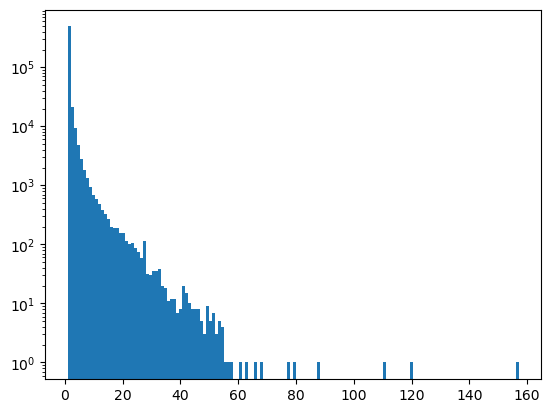

In [19]:
# histogram
plt.hist(dd.value_counts().values, bins=150)
plt.yscale('log')
plt.show()